#### Name: Rajnita Leichombam
#### USC-ID : 1370432160
#### Github-Username: Rajnita

## HOMEWORK -5

### Decision Trees as Interpretable Models

(a)
Download the Accute Inflamations data from
https://archive.ics.uci.edu/
ml/datasets/Acute+Inflammations


The data is downloaded and put in the /data folder

(b)
Build a decision tree on the whole data set and plot it.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skmultilearn.problem_transform import LabelPowerset
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import KFold, GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

## Reading data 

In [2]:
df=pd.read_csv('../data/diagnosis.data',decimal=",",delim_whitespace=True,encoding='UTF_16',header=None)
features=['temp','nausea_occurence','lumbar_pain','urine_push','micturition_pain','urethra_burn']
target=["uri_bladder_inflammation","nephritis"]
columns=features+target
df.columns=columns

In [3]:
df

,temp,nausea_occurence,lumbar_pain,urine_push,micturition_pain,urethra_burn,uri_bladder_inflammation,nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


### <span style="color:red"> It is given as 'Build a decision tree on the whole data set'. So, I assumed that all of the dataset is considered as training dataset and a decision classifer is fit with the whole data. No split of test and train data is to be done.However, If the question referred to has the need of train n test data split, please refer the bottom of the notebook after REFERENCES section for 1.b, 1.c and 1.d </span>

## Building Classifier using Label Power Set

In [4]:
## Converting to numerical values
numerical_df = df.replace(to_replace = ['yes','no'],value = ['1','0']).astype(float)

In [5]:
# initialize label powerset multi-label classifier
classifier = LabelPowerset(DecisionTreeClassifier(random_state=0))

x_train =numerical_df[features]
y_train=numerical_df[target]
# train
classifier.fit(x_train, y_train)
# predict
pred_y= classifier.predict(x_train)
acc = accuracy_score(y_train, pred_y)
print("Train Accuracy score using accuracy_score is ",acc)

Train Accuracy score using accuracy_score is  1.0


Decision Tree - using label power set


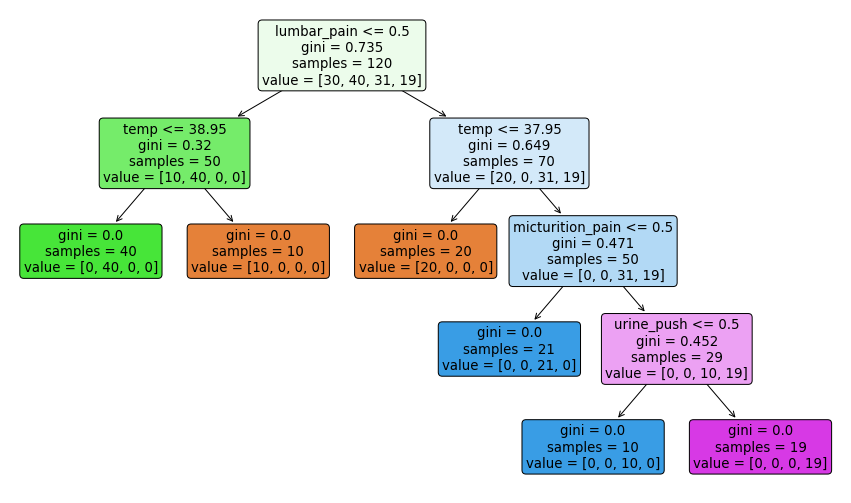

In [6]:
plt.subplots(figsize=(15, 9))
tree.plot_tree(classifier.classifier, filled=True, rounded=True, feature_names=features)
print("Decision Tree - using label power set")
plt.show()

## Another option - Building decision classifier without label powerset

In [7]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
pr_y=dt.predict(x_train)
acc = accuracy_score(y_train, pr_y)
print("Train Accuracy score using accuracy_score is ",acc)

Train Accuracy score using accuracy_score is  1.0


Decision Tree - without label powerset


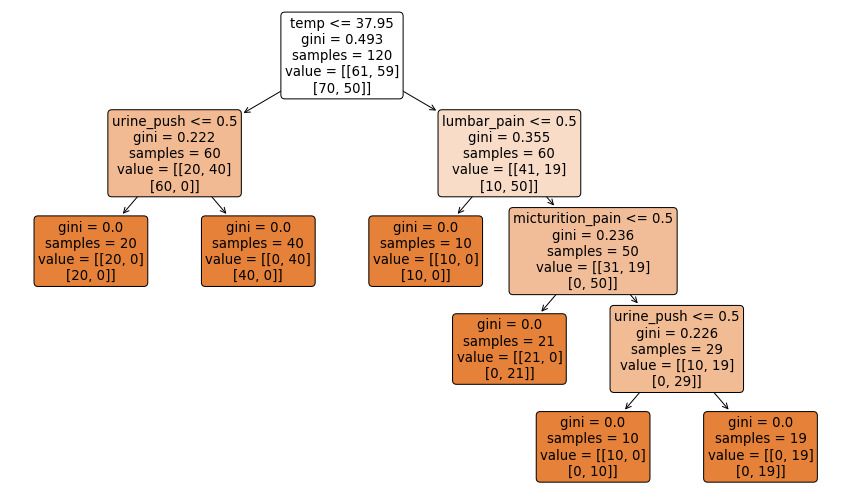

In [8]:
plt.subplots(figsize=(15, 9))
tree.plot_tree(dt,filled=True, rounded=True, feature_names=features,)
print("Decision Tree - without label powerset")
plt.show()

(c)
Convert the decision rules into a set of IF-THEN rules.

### CONVERSION TO IF_THEN RULES - PSEUDO CODE

In [9]:
def tree_to_code(tree, feature_names):

    '''
    Outputs a decision tree model as a Python function

    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as a function
    feature_names: list
        The feature names of the dataset used for building the decision tree
    '''

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [10]:
def tree_to_pseudo(tree, feature_names):

# Outputs a decision tree model as if/then pseudocode

# Parameters:
# -----------
# tree: decision tree model
#     The decision tree to represent as pseudocode
# feature_names: list
#     The feature names of the dataset used for building the decision tree

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
        else:
            print(indent,"return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

### Tree to pseudo - decision classifier with label powerset

In [11]:
tree_to_pseudo(classifier.classifier, features)

 if ( lumbar_pain <= 0.5 ) {
   if ( temp <= 38.95000076293945 ) {
     return [[ 0. 40.  0.  0.]]
   } else {
     return [[10.  0.  0.  0.]]
   }
 } else {
   if ( temp <= 37.95000076293945 ) {
     return [[20.  0.  0.  0.]]
   } else {
     if ( micturition_pain <= 0.5 ) {
       return [[ 0.  0. 21.  0.]]
     } else {
       if ( urine_push <= 0.5 ) {
         return [[ 0.  0. 10.  0.]]
       } else {
         return [[ 0.  0.  0. 19.]]
       }
     }
   }
 }


### Tree to code - decision classifier with label powerset

In [12]:
tree_to_code(classifier.classifier, features)

def tree(temp, nausea_occurence, lumbar_pain, urine_push, micturition_pain, urethra_burn):
  if lumbar_pain <= 0.5:
    if temp <= 38.95000076293945:
      return [[ 0. 40.  0.  0.]]
    else:  # if temp > 38.95000076293945
      return [[10.  0.  0.  0.]]
  else:  # if lumbar_pain > 0.5
    if temp <= 37.95000076293945:
      return [[20.  0.  0.  0.]]
    else:  # if temp > 37.95000076293945
      if micturition_pain <= 0.5:
        return [[ 0.  0. 21.  0.]]
      else:  # if micturition_pain > 0.5
        if urine_push <= 0.5:
          return [[ 0.  0. 10.  0.]]
        else:  # if urine_push > 0.5
          return [[ 0.  0.  0. 19.]]


### Tree to pseudo - decision classifier without label powerset

In [13]:
tree_to_pseudo(dt, features)

 if ( temp <= 37.95000076293945 ) {
   if ( urine_push <= 0.5 ) {
     return [[20.  0.]
 [20.  0.]]
   } else {
     return [[ 0. 40.]
 [40.  0.]]
   }
 } else {
   if ( lumbar_pain <= 0.5 ) {
     return [[10.  0.]
 [10.  0.]]
   } else {
     if ( micturition_pain <= 0.5 ) {
       return [[21.  0.]
 [ 0. 21.]]
     } else {
       if ( urine_push <= 0.5 ) {
         return [[10.  0.]
 [ 0. 10.]]
       } else {
         return [[ 0. 19.]
 [ 0. 19.]]
       }
     }
   }
 }


### Tree to code - decision classifier without label powerset

In [14]:
tree_to_code(dt, features)

def tree(temp, nausea_occurence, lumbar_pain, urine_push, micturition_pain, urethra_burn):
  if temp <= 37.95000076293945:
    if urine_push <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if urine_push > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if temp > 37.95000076293945
    if lumbar_pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if lumbar_pain > 0.5
      if micturition_pain <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if micturition_pain > 0.5
        if urine_push <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if urine_push > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


(d)
Use cost-complexity pruning to find a minimal decision tree and a set of decision
rules with high interpretability.

## Finding minimal decision tree

In [15]:
path = classifier.classifier.cost_complexity_pruning_path(x_train, y_train)
alphas=path['ccp_alphas']
print("Alpha Values :",alphas)

all_MSE=[]

for alpha in alphas:
    decision_tree = DecisionTreeClassifier(ccp_alpha=alpha)
    kf = KFold(n_splits=10)
    MSE=[]
    for train_index,val_index in kf.split(x_train):
        x_train_dt, val_x_dt = x_train.iloc[train_index.tolist(),:], x_train.iloc[val_index.tolist(),:]
        y_train_dt, val_y_dt = np.array(y_train)[train_index.tolist()], np.array(y_train)[val_index.tolist()]
        d_tree = DecisionTreeClassifier(ccp_alpha=alpha,random_state=0)
        d_tree.fit(x_train_dt,y_train_dt)
        pred_val_y=d_tree.predict(val_x_dt)
        mse = mean_squared_error(val_y_dt, pred_val_y)
        MSE.append(mse)
        
    all_MSE.append(np.mean(MSE))


min_mse_index=np.argmin(all_MSE)
best_alpha=alphas[min_mse_index]

print("Best Alpha is:", best_alpha)
result=pd.DataFrame({ 'Alphas': alphas, 
    'MSE': all_MSE})
        
result

Alpha Values : [0.         0.04908333 0.07947222 0.11111111 0.20423611]
Best Alpha is: 0.0


,Alphas,MSE
0,0.000000,0.079167
1,0.049083,0.158333
2,0.079472,0.200000
3,0.111111,0.295833
4,0.204236,0.429167


## Testing using Decision tree with  best alpha value

In [16]:
best_tree = DecisionTreeClassifier(ccp_alpha=best_alpha,random_state=0)
best_tree.fit(x_train,y_train)
pred_y=best_tree.predict(x_train)
mse_test = mean_squared_error(y_train, pred_y)
print("Test mse:", mse_test)

Test mse: 0.0


In [17]:
tree_to_pseudo(best_tree, features)

 if ( temp <= 37.95000076293945 ) {
   if ( urine_push <= 0.5 ) {
     return [[20.  0.]
 [20.  0.]]
   } else {
     return [[ 0. 40.]
 [40.  0.]]
   }
 } else {
   if ( lumbar_pain <= 0.5 ) {
     return [[10.  0.]
 [10.  0.]]
   } else {
     if ( micturition_pain <= 0.5 ) {
       return [[21.  0.]
 [ 0. 21.]]
     } else {
       if ( urine_push <= 0.5 ) {
         return [[10.  0.]
 [ 0. 10.]]
       } else {
         return [[ 0. 19.]
 [ 0. 19.]]
       }
     }
   }
 }


In [18]:
tree_to_pseudo(best_tree, features)

 if ( temp <= 37.95000076293945 ) {
   if ( urine_push <= 0.5 ) {
     return [[20.  0.]
 [20.  0.]]
   } else {
     return [[ 0. 40.]
 [40.  0.]]
   }
 } else {
   if ( lumbar_pain <= 0.5 ) {
     return [[10.  0.]
 [10.  0.]]
   } else {
     if ( micturition_pain <= 0.5 ) {
       return [[21.  0.]
 [ 0. 21.]]
     } else {
       if ( urine_push <= 0.5 ) {
         return [[10.  0.]
 [ 0. 10.]]
       } else {
         return [[ 0. 19.]
 [ 0. 19.]]
       }
     }
   }
 }


Minimal Decision Tree with best alpha 


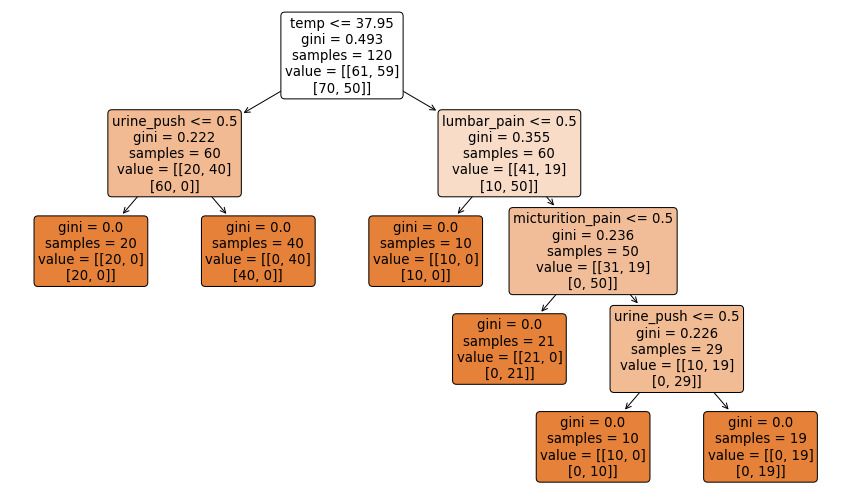

In [19]:
plt.subplots(figsize=(15, 9))
print("Minimal Decision Tree with best alpha ")
tree.plot_tree(best_tree, filled=True, rounded=True, feature_names=features)
plt.show()

## 2.The LASSO and Boosting for Regression

(a)
Download the Communities and Crime data
3
from
https://archive.ics.uci.
edu/ml/datasets/Communities+and+Crime
. Use the first 1495 rows of data as
the training set and the rest as the test set.

### Getting columns

In [20]:
def getPredictiveColumnNames():
    column_names=[]
    with open("../data/communities.names") as fh:
        for line in fh:
            if line.startswith("@attribute"):
                splitted=line.split()
                column_names.append(splitted[1])

    print("Number of total columns=",len(column_names)) 
    return column_names

## Reading data and splitting into train and test set

In [21]:
comm_df=pd.read_csv('../data/communities.data',header=None,na_values = "?")
print("**************************ALL DATA**************************")

column_names=getPredictiveColumnNames();
comm_df.columns=column_names;

non_predictive_cols = ['state','county','community','communityname','fold']
pred_cols = [i for i in column_names if i not in non_predictive_cols]
print("Number of predictive columns=",len(pred_cols)) 
target=['ViolentCrimesPerPop']
features = [col for col in pred_cols if col not in target]
# print("\n\nFeatures are:", features)

predictive_df = comm_df[pred_cols] 

train_set=predictive_df[:1495]
test_set=predictive_df[1495:]

predictive_df 

**************************ALL DATA**************************
Number of total columns= 128
Number of predictive columns= 123


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


(b)
The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set. The data description mentions some features
are nonpredictive. Ignore those features.

## Data imputation - Using Simple Imputer

In [22]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
##fitted on training set, the target column do not have any missing data. The same fitted imputer is used for test data
##https://stats.stackexchange.com/questions/95083/imputation-before-or-after-splitting-into-train-and-test
##https://datascience.stackexchange.com/questions/52282/is-it-right-to-impute-train-and-test-set
imp_mean.fit(train_set)

tfd_train_set = imp_mean.transform(train_set)
transformed_train_df=pd.DataFrame(tfd_train_set)
transformed_train_df.columns=pred_cols
print('IMPUTED TRAIN SET')
transformed_train_df

IMPUTED TRAIN SET


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03


In [23]:
tfd_test_set = imp_mean.transform(test_set)
transformed_test_df=pd.DataFrame(tfd_test_set)
transformed_test_df.columns=pred_cols
print("IMPUTED TEST SET")
transformed_test_df

IMPUTED TEST SET


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


## Data imputation - Manual way by calculating Mean

In [24]:
train_set_copy=train_set
test_set_copy=test_set

transformed_train_df=train_set_copy.fillna(train_set_copy.mean())
transformed_test_df=test_set_copy.fillna(train_set_copy.mean())
transformed_train_df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03


In [25]:
transformed_test_df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


(c)
Plot a correlation matrix for the features in the data set.

### Correlation Matrix for the features

In [26]:
imputed_dataset=pd.concat([transformed_train_df, transformed_test_df])
imputed_dataset

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


In [27]:
correlation = imputed_dataset[features].corr()
correlation.style.background_gradient(cmap='coolwarm')

## Seaborn heatmap displaying correlation

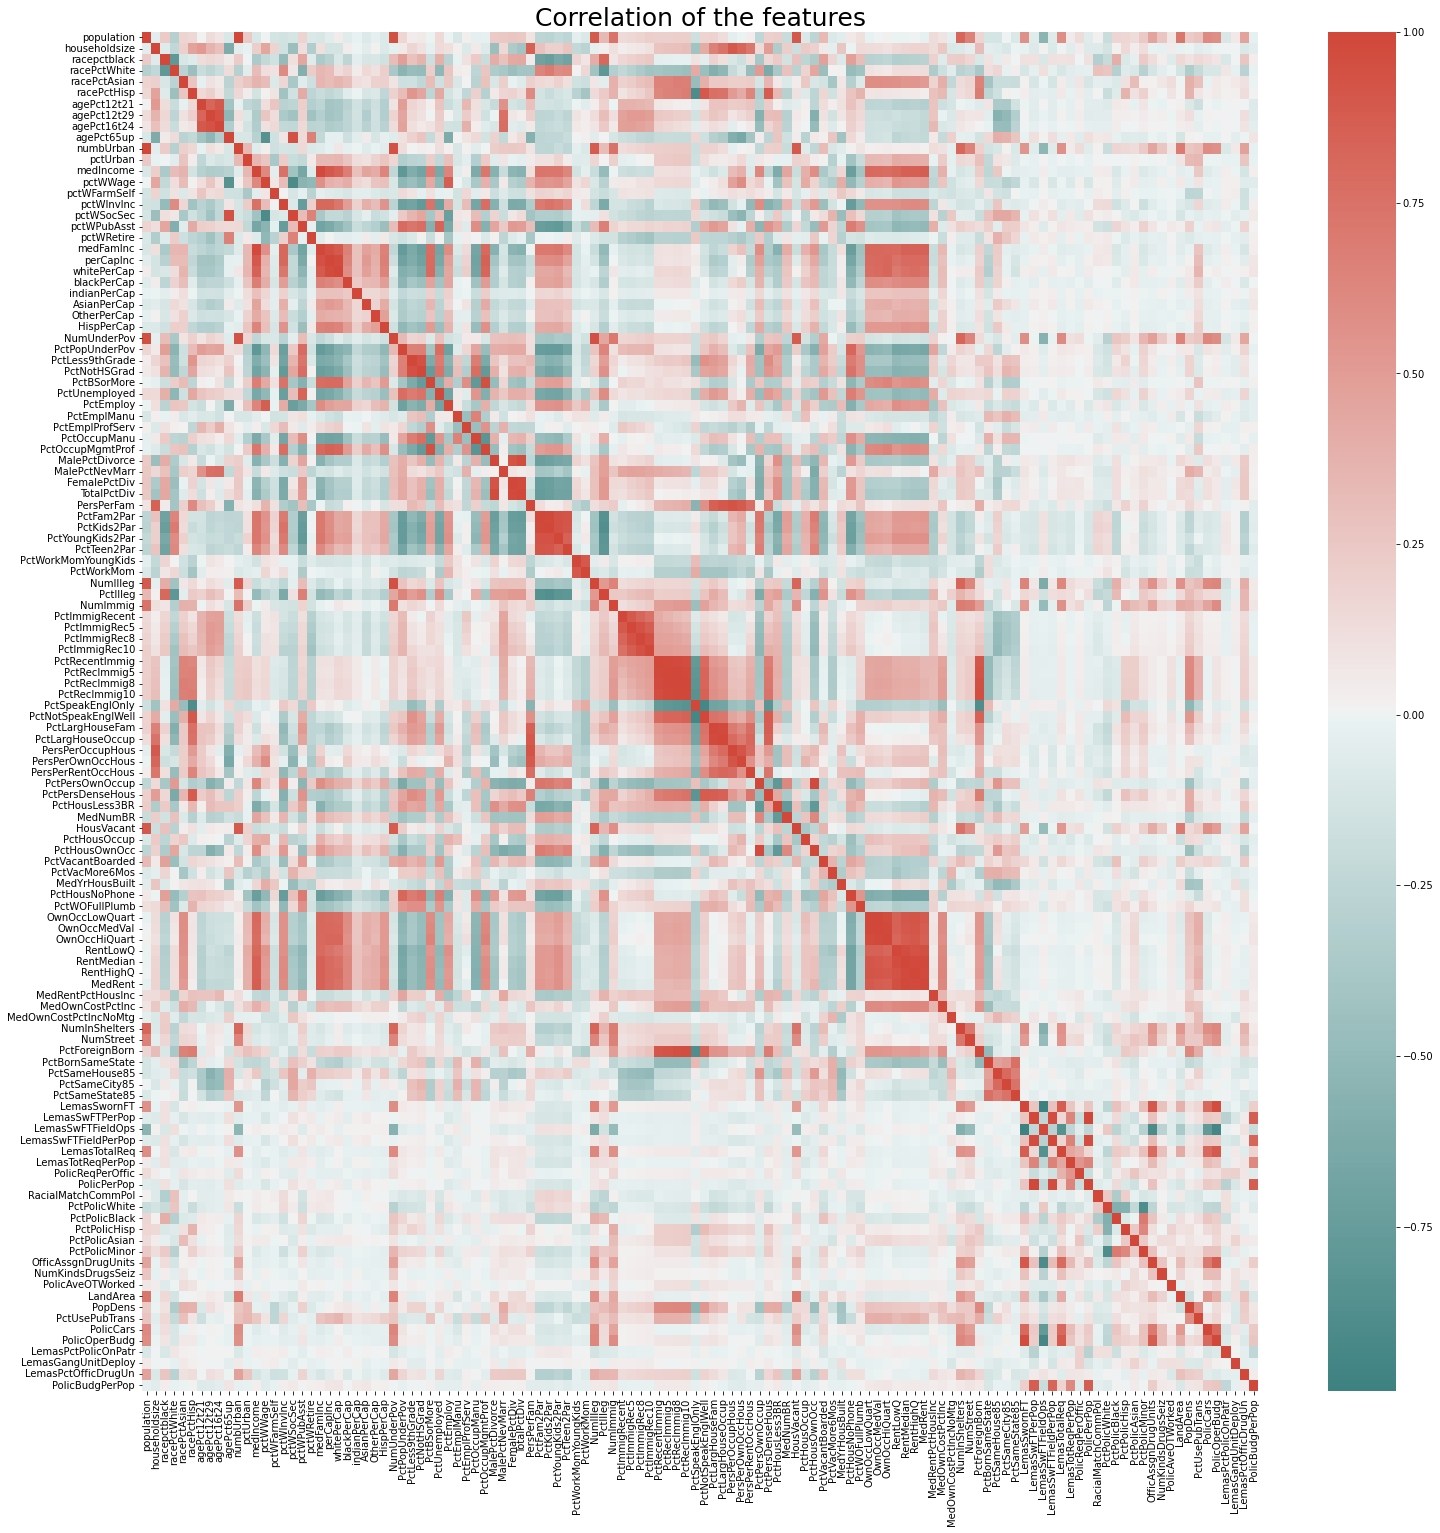

In [28]:
f, ax = plt.subplots(figsize=(25, 25))
plt.title("Correlation of the features",size=25)
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values,ax=ax, cmap=sns.diverging_palette(190, 15, as_cmap=True))
plt.show()

(d)
Calculate the Coefficient of Variation
CV
for each feature, where
CV
=
s/m
, in
which
s
is sample standard deviation and
m
is sample mean.

## Coefficient of Variation CV 

In [29]:
CV_for_features = {}
for feature in features:
    feature_data = imputed_dataset[feature]
    std = feature_data.std()
    mean = feature_data.mean()
    cv=std/mean
    CV_for_features[feature] = cv
    
print('COEFFICIENT OF VARIATION')
cv_df=pd.DataFrame(CV_for_features.items(), columns=['Feature', 'Coefficient_of_variation'])

with pd.option_context('display.max_rows', None,):
    print(cv_df)

COEFFICIENT OF VARIATION
                   Feature  Coefficient_of_variation
0               population                  2.203503
1            householdsize                  0.353298
2             racepctblack                  1.410920
3             racePctWhite                  0.323782
4             racePctAsian                  1.359162
5              racePctHisp                  1.614278
6              agePct12t21                  0.365840
7              agePct12t29                  0.290693
8              agePct16t24                  0.495161
9               agePct65up                  0.423442
10               numbUrban                  2.001744
11                pctUrban                  0.638849
12               medIncome                  0.579753
13                pctWWage                  0.327710
14            pctWFarmSelf                  0.700030
15              pctWInvInc                  0.359240
16              pctWSocSec                  0.368513
17             pctWPu

(e)
Pick
floor 
√
128
c
features with highest
CV
, and make scatter plots and box plots for
them. Can you draw conclusions about significance of those features, just by the
scatter plots?

In [30]:
num_of_top_features = np.floor(np.sqrt(128)).astype(int)
sorted_cv = sorted(CV_for_features.items(), key=lambda x: x[1], reverse=True)
print("*******Sorted CVs**********")
sorted_cv

*******Sorted CVs**********


[('NumStreet', 4.407702440863974),
 ('NumInShelters', 3.4854812687233436),
 ('NumIlleg', 2.9941964494842983),
 ('NumImmig', 2.9004971638852743),
 ('LemasPctOfficDrugUn', 2.555266002927139),
 ('NumUnderPov', 2.304969714852185),
 ('population', 2.203502536390972),
 ('numbUrban', 2.0017436381957676),
 ('HousVacant', 1.9587797297820901),
 ('LandArea', 1.6780314766044726),
 ('racePctHisp', 1.614277791710685),
 ('PctNotSpeakEnglWell', 1.4590665973274666),
 ('PctUsePubTrans', 1.4166726646730607),
 ('racepctblack', 1.4109203963756864),
 ('racePctAsian', 1.3591621938222074),
 ('PctRecentImmig', 1.3001003000858602),
 ('PctRecImmig5', 1.2976318064373376),
 ('PctRecImmig10', 1.2840337734030223),
 ('PctRecImmig8', 1.281232973017656),
 ('PctPersDenseHous', 1.1271995855289663),
 ('PctForeignBorn', 1.0722913018210616),
 ('PctVacantBoarded', 1.0647424234558736),
 ('PctIlleg', 0.9198028889511525),
 ('PctHousNoPhone', 0.9182109653373376),
 ('OwnOccMedVal', 0.8787498368451837),
 ('PctPolicAsian', 0.876274

In [31]:
print("##########Top 11 features###########")
for i in range(0, num_of_top_features):
    print(sorted_cv[i][0],':',sorted_cv[i][1])

##########Top 11 features###########
NumStreet : 4.407702440863974
NumInShelters : 3.4854812687233436
NumIlleg : 2.9941964494842983
NumImmig : 2.9004971638852743
LemasPctOfficDrugUn : 2.555266002927139
NumUnderPov : 2.304969714852185
population : 2.203502536390972
numbUrban : 2.0017436381957676
HousVacant : 1.9587797297820901
LandArea : 1.6780314766044726
racePctHisp : 1.614277791710685


In [32]:
top_11_df = pd.DataFrame()
for i in range(0, num_of_top_features):
    feature_data = imputed_dataset[sorted_cv[i][0]]
    top_11_df = pd.concat([top_11_df, feature_data], axis=1)
top_11_df

,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,HousVacant,LandArea,racePctHisp
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...
1989,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.02,0.01,0.16
1990,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.03,0.02,0.32
1991,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.21,0.08,0.25
1992,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.05,0.03,0.10


## Scatter Plot for features with highest Coefficient of variation

SCATTER PLOT : features with highest Coefficient of variation


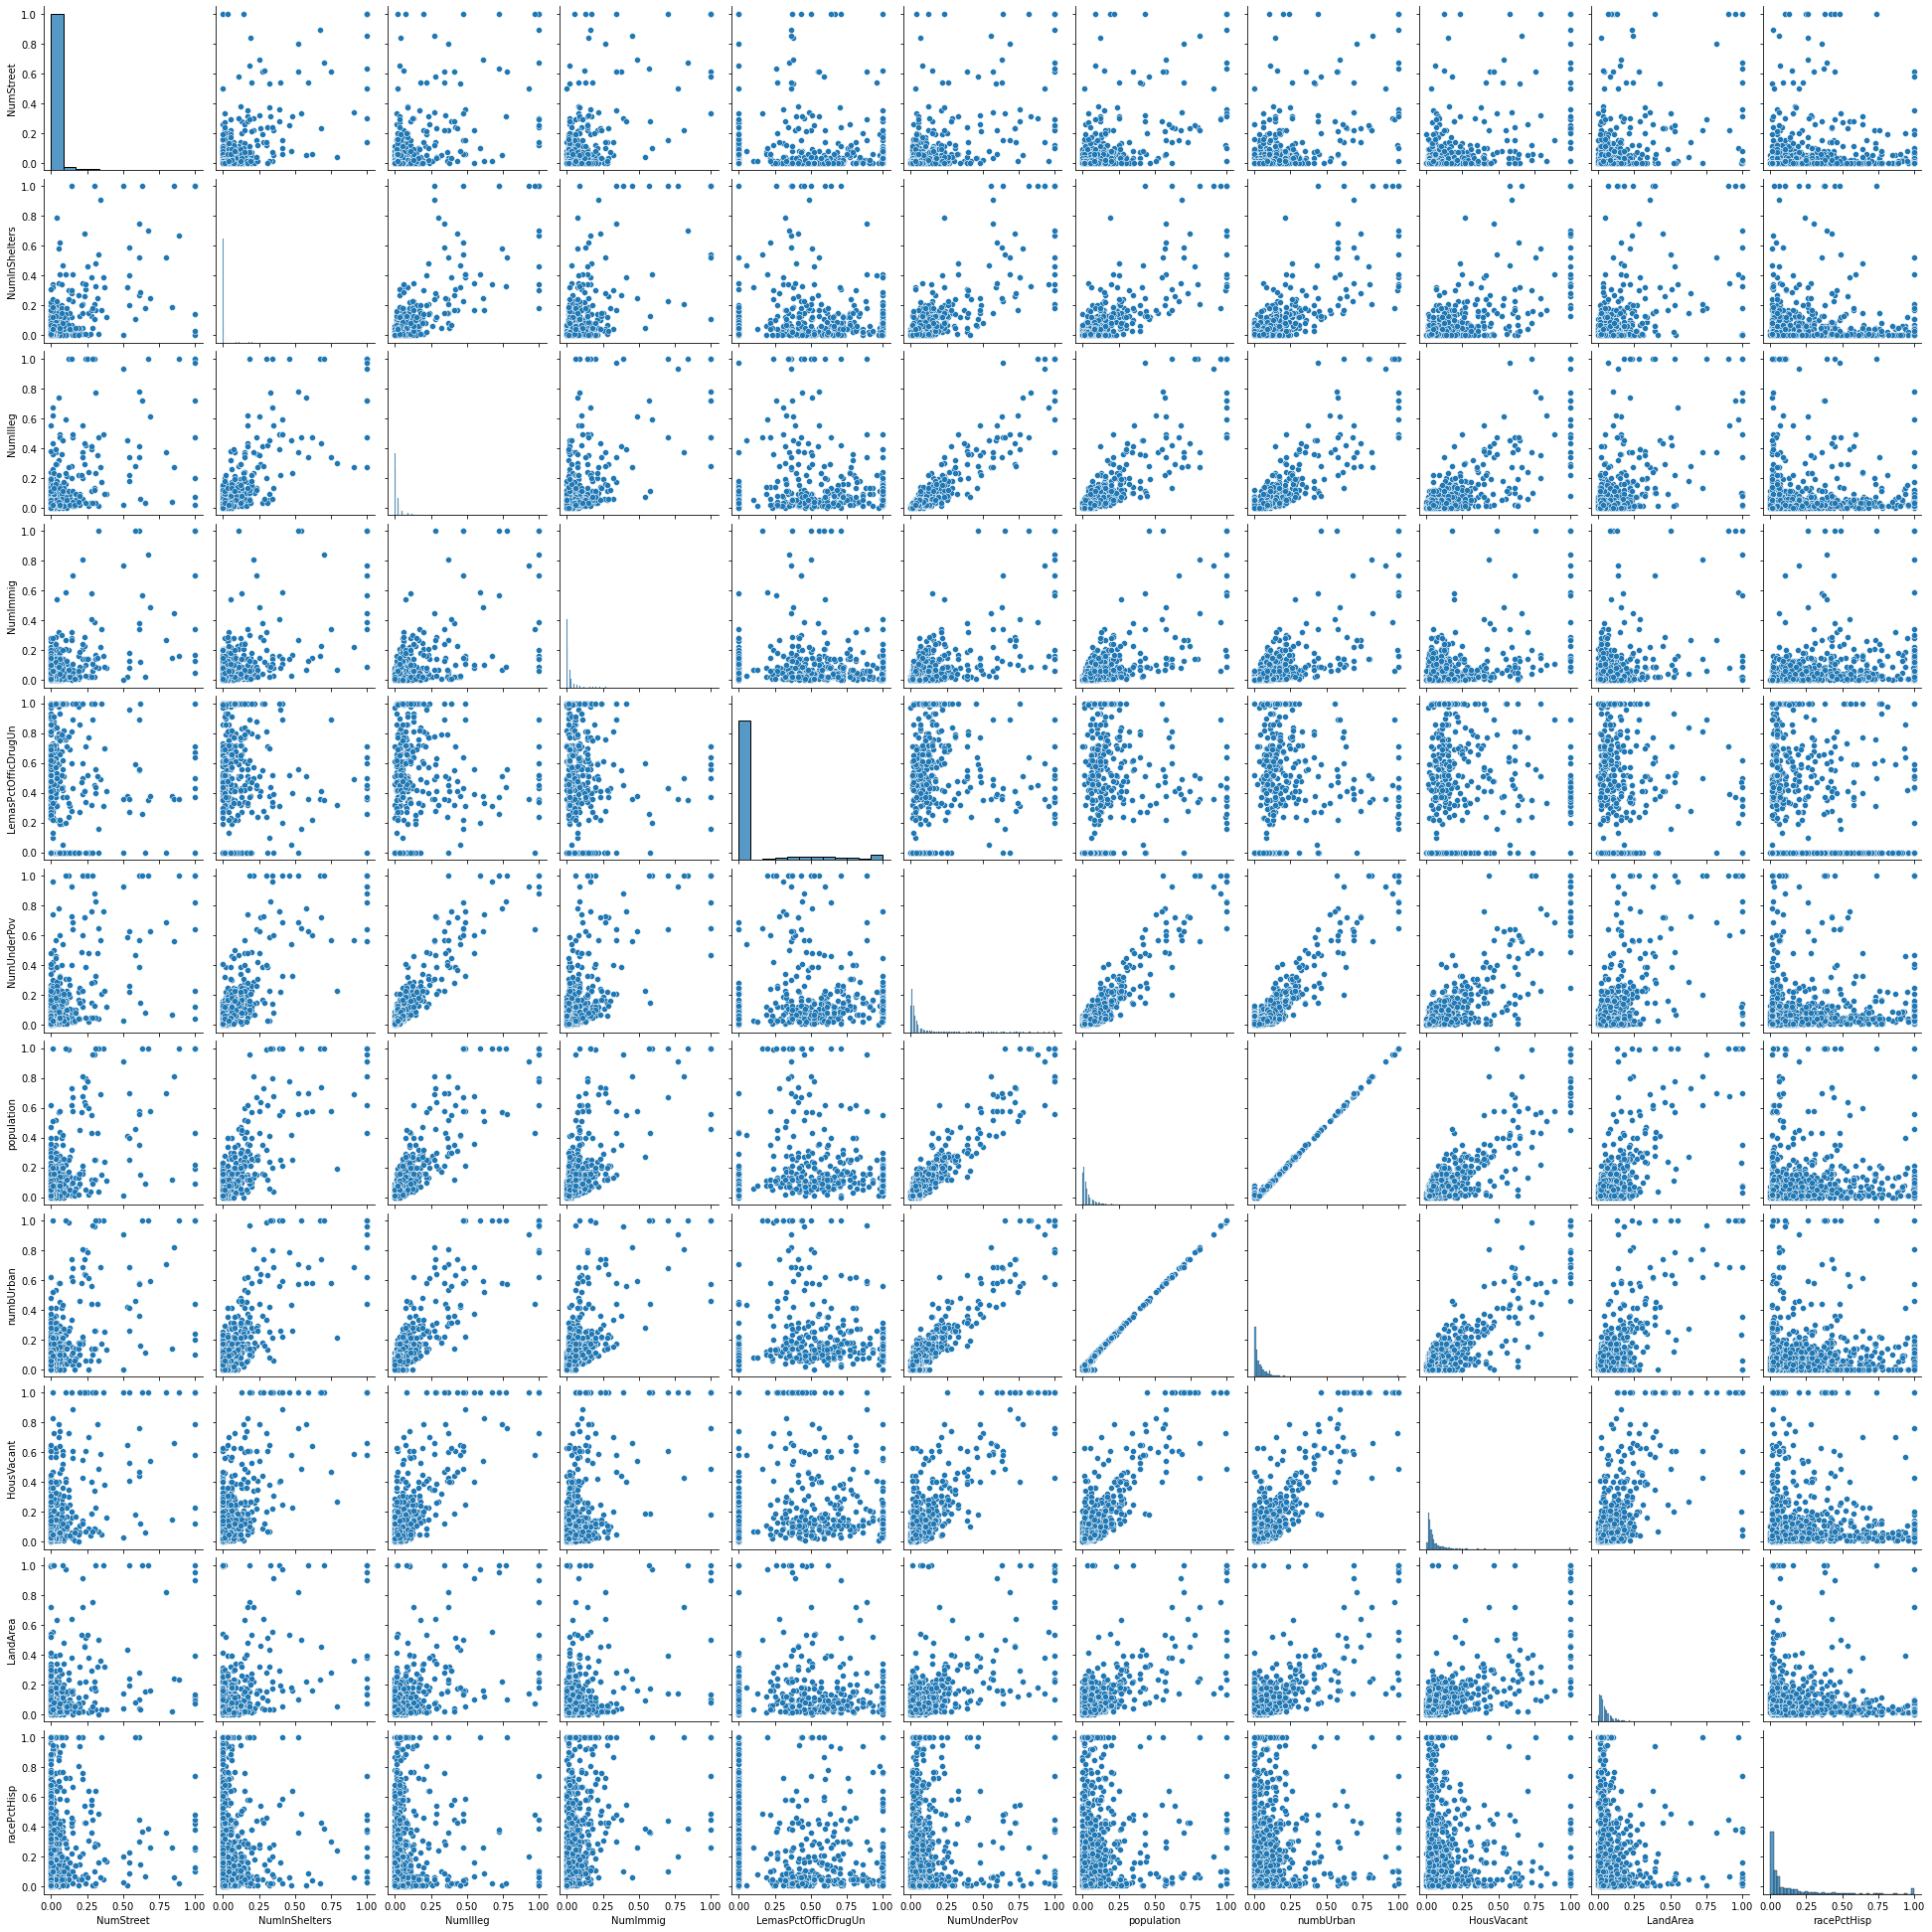

In [33]:
print("SCATTER PLOT : features with highest Coefficient of variation")
sns.pairplot(top_11_df)

## Observations

#### From the scatter plot, we can see that there is a strong linear correlation between population and numbUrban i.e. number of people in urban areas and the population is highly correlated.
#### We can see that for relations between LemasPctOfficDrugUn and all other features are quite scattered
#### Also there is a strong correlation between NumUnderPov and numbUrban, population and NumUnderPov.


#### We can't really draw  conclusions from the scatter plots if the features are significant w.r.t the target variable, we can just get a slight sense of how the features are significant  to each other in a broad manner, like how are they correlated.


## Box Plot for features with highest Coefficient of variation

BOX PLOT OF THE TOP CV FEATURES


<AxesSubplot:>

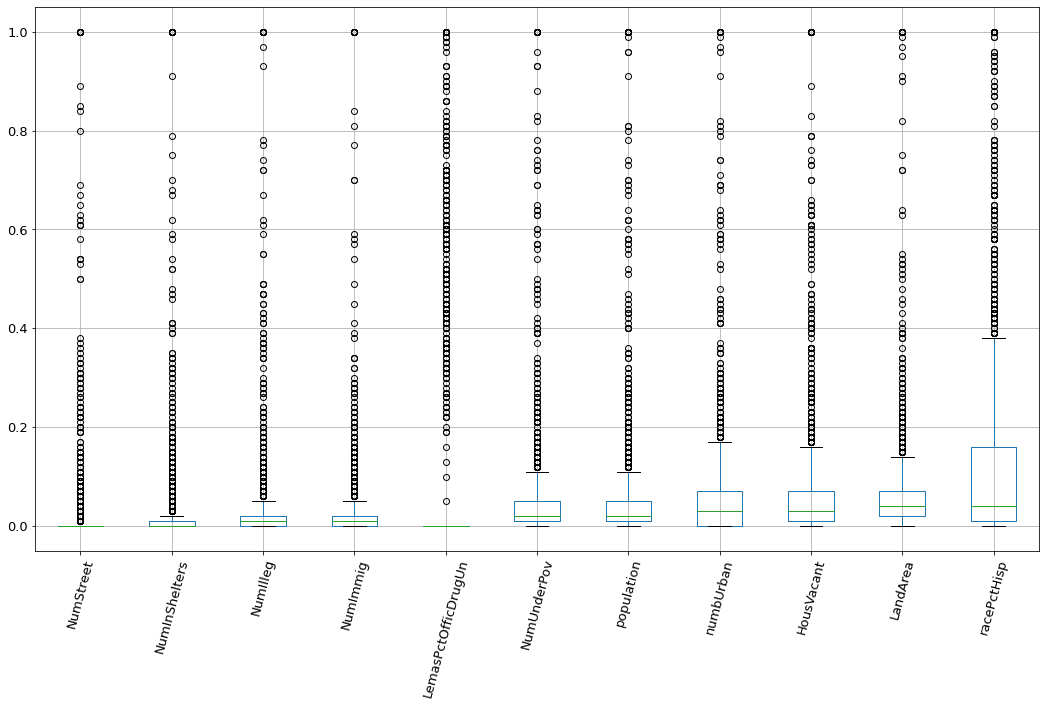

In [34]:
print('BOX PLOT OF THE TOP CV FEATURES')
top_11_df.boxplot(rot=75,fontsize=13, figsize=(18, 10))

(f)
Fit a linear model using least squares to the training set and report the test error.

## Least Squares Linear Model

In [35]:
def getTrainTestSplit(transformed_train_df, transformed_test_df):
    train_X = transformed_train_df[features]
    train_Y = transformed_train_df['ViolentCrimesPerPop']
    test_X=transformed_test_df[features]
    test_Y=transformed_test_df['ViolentCrimesPerPop']
    return train_X,train_Y,test_X,test_Y


In [36]:
trainX,trainY,testX,testY = getTrainTestSplit(transformed_train_df, transformed_test_df)
ols_lm= LinearRegression()
ols_lm = ols_lm.fit(trainX, trainY)
ols_pred_y=ols_lm.predict(testX)
ols_mse=mean_squared_error(testY, ols_pred_y);
ols_mse = round(ols_mse, 3)
print("Least Squares Linear Reg Model - Test MSE : ", ols_mse)

Least Squares Linear Reg Model - Test MSE :  0.018


(g)
Fit a ridge regression model on the training set, with
λ
chosen by cross-validation.
Report the test error obtained.

## Ridge Regression Model

In [37]:
alphas = 10**np.linspace(10,-2,110)*0.5
##Selecting best alpha or lambda value by cross validation
ridge_mdl=RidgeCV(alphas=alphas, cv=10).fit(trainX, trainY) 
best_lambda=ridge_mdl.alpha_
print("RIDGE: Best Alpha or Lambda val:",best_lambda)
    
##building model with best alpha val
ridge_mdl = Ridge(alpha=best_lambda)
ridge_mdl = ridge_mdl.fit(trainX,trainY) 
ridge_pred_y= ridge_mdl.predict(testX)
ridge_mse = mean_squared_error(testY, ridge_pred_y)  
print('Ridge regression - Test MSE: ', ridge_mse)

RIDGE: Best Alpha or Lambda val: 2.1936727437497834
Ridge regression - Test MSE:  0.017607363544114865


(h)
Fit a LASSO model on the training set, with
λ
chosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with standardized
features. Report the test error for both cases and
compare them.

## Lasso Regression Model

In [38]:
alphas = 10**np.linspace(10,-2,110)*0.5
lasso_mdl = LassoCV(alphas=alphas, cv=10).fit(trainX, trainY)
best_lasso_lambda=lasso_mdl.alpha_
print("LASSO: Best Alpha or Lambda val:",best_lasso_lambda)

lasso_mdl = Lasso(alpha=best_lasso_lambda)
lasso_mdl = lasso_mdl.fit(trainX, trainY) 
lasso_pred_y= lasso_mdl.predict(testX)
lasso_mse = mean_squared_error(testY, lasso_pred_y) 
print('Lasso regression - Test MSE: ', lasso_mse)

##Selecting features
lasso_coefs=lasso_mdl.coef_
selected_features_map={}
for i in range(0,len(lasso_coefs)):
    if lasso_coefs[i]!=0:
        selected_features_map[features[i]]=lasso_coefs[i]
selected_features= pd.DataFrame(list(selected_features_map.items()),columns = ['feature','coefficient'])
print("\n****Selected Features******")
selected_features

LASSO: Best Alpha or Lambda val: 0.005
Lasso regression - Test MSE:  0.018805364920055034

****Selected Features******


,feature,coefficient
0,racePctWhite,-0.208595
1,pctUrban,0.025421
2,MalePctDivorce,0.041945
3,PctKids2Par,-0.322419
4,PctIlleg,0.196178
5,PctPersDenseHous,0.017711
6,HousVacant,0.028388
7,PctVacantBoarded,0.017270


## Standardized - Lasso Regression Model

In [39]:
scaler = StandardScaler()
scaler = scaler.fit(trainX)
scaledTrainX = scaler.transform(trainX)
scaledTestX = scaler.transform(testX)

alphas = 10**np.linspace(10,-2,110)*0.5
std_lasso_mdl = LassoCV(alphas=alphas, cv=10).fit( scaledTrainX, trainY)
best_lasso_lambda_std=std_lasso_mdl.alpha_
print("LASSO: Best Alpha or Lambda val:",best_lasso_lambda_std)

std_lasso_mdl = Lasso(alpha=best_lasso_lambda_std)
std_lasso_mdl = std_lasso_mdl.fit(scaledTrainX, trainY) 
std_lasso_pred_y= std_lasso_mdl.predict(scaledTestX)
std_lasso_mse = mean_squared_error(testY, std_lasso_pred_y) 
print('Standardized: Lasso regression - Test MSE: ', std_lasso_mse)

##Selecting features
std_lasso_coefs=std_lasso_mdl.coef_
std_selected_features_map={}
for i in range(0,len(std_lasso_coefs)):
    if std_lasso_coefs[i]!=0:
        std_selected_features_map[features[i]]=std_lasso_coefs[i]
std_selected_features= pd.DataFrame(list(std_selected_features_map.items()),columns = ['feature','coefficient'])
std_selected_features

LASSO: Best Alpha or Lambda val: 0.005
Standardized: Lasso regression - Test MSE:  0.017380593204266204


,feature,coefficient
0,racepctblack,0.048355
1,racePctWhite,-0.006835
2,agePct12t29,-0.006980
3,pctUrban,0.013432
4,pctWInvInc,-0.000224
5,pctWPubAsst,0.000100
6,pctWRetire,-0.003352
7,AsianPerCap,0.001246
8,MalePctDivorce,0.023163
9,PctKids2Par,-0.053197


## Lasso Reg Model - Standardized and Non-Standardized Comparisons

#### In this case, the test error (MSE) after standardizing is slightly lower, but negligible. So, we cant really say about the MSE, it may vary. In this test, after standardizing it was lower and the selected number of features is more than non-standardizing way.


(i)
Fit a PCR model on the training set, with
M
(the number of principal compo-
nents) chosen by cross-validation. Report the test error obtained.

## PCR Model - finding best M

In [40]:
from sklearn.model_selection import cross_val_score
all_mse=[]
cv_scores=[]
for m in range(1,len(features)+1):
    kf = KFold(n_splits=10)
    pca = PCA(n_components=m)
    transformed_trainX = pca.fit_transform(trainX)
    MSE= []
    
    #Another way
#     sc=cross_val_score(model, transformed_trainX ,trainY, cv=10)
#     cv_scores.append(np.mean(sc))
    
    for train_index,val_index in kf.split(transformed_trainX ):
        train_x, val_x = transformed_trainX[train_index.tolist()], transformed_trainX[val_index.tolist()]
        train_y, val_y = np.array(trainY)[train_index.tolist()], np.array(trainY)[val_index.tolist()]
        model=LinearRegression()
        model = model.fit(train_x,train_y)
        pred_y = model.predict(val_x)
        mse = mean_squared_error(val_y, pred_y)
        MSE.append(mse)

    all_mse.append(np.mean(MSE))

result=pd.DataFrame({"Components":range(1,len(features)+1), "Validation MSE": all_mse})
with pd.option_context('display.max_rows', None,):
    print(result)

     Components  Validation MSE
0             1        0.037942
1             2        0.030647
2             3        0.027632
3             4        0.024277
4             5        0.023077
5             6        0.022603
6             7        0.020103
7             8        0.020149
8             9        0.020069
9            10        0.019990
10           11        0.019998
11           12        0.020042
12           13        0.019950
13           14        0.019960
14           15        0.019968
15           16        0.019986
16           17        0.020005
17           18        0.020044
18           19        0.020063
19           20        0.020129
20           21        0.020154
21           22        0.020123
22           23        0.019919
23           24        0.019913
24           25        0.019974
25           26        0.020035
26           27        0.019984
27           28        0.019941
28           29        0.019944
29           30        0.019801
30      

## Print Best M and Get Test Error

In [41]:
best_m=np.argmin(all_mse)+1
print("M value with min MSE - Best M:", best_m)

##Fitting with best M
best_pca=PCA(n_components=best_m)
best_pca = best_pca.fit(trainX)
pcaTrainX = best_pca.transform(trainX)
pcaTestX = best_pca.transform(testX)

lr_model = LinearRegression()
lr_model = lr_model.fit(pcaTrainX, trainY)

pca_pred_y = lr_model.predict(pcaTestX)

pca_mse = mean_squared_error(testY, pca_pred_y)  
print("Test MSE for best M : ", pca_mse);

M value with min MSE - Best M: 96
Test MSE for best M :  0.018472760675392632


## PCA Plot

(-1.0, 127.05)

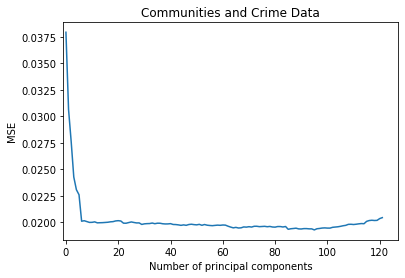

In [42]:
plt.plot(all_mse)
plt.xlabel('Number of principal components')
plt.ylabel('MSE')
plt.title('Communities and Crime Data')
plt.xlim(xmin=-1)


(j)
In this section, we would like to fit a boosting tree to the data. As in classification
trees, one can use any type of regression at each node to build a multivariate
regression tree. Because the number of variables is large in this problem, one
can use
L
1
-penalized regression at each node. Such a tree is called
L
1
penalized
gradient boosting tree. You can use XGBoost
5
to fit the model tree. Determine
α
(the regularization term) using cross-validation.

## L1-Penalized Gradient Boosting Tree

### Find alpha using GridCV

In [43]:
# alphas = (10**np.linspace(10,-2,110)*0.5).tolist()
alphas = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1.2,1.4,1.6,1.8, 2, 3, 4, 5, 10, 20]
xgb_model = XGBRegressor()
params = {
    'reg_alpha': alphas,   
}

xgb_model = GridSearchCV(xgb_model,param_grid=params, cv=5)
xgb_model = xgb_model.fit(trainX, trainY)

xgb_best_lambda= xgb_model.best_params_['reg_alpha']

print('L1 Penalized Xboost - Best Lambda - ',xgb_best_lambda)

best_xgb_model = XGBRegressor(reg_alpha=xgb_best_lambda)
best_xgb_model = best_xgb_model.fit(trainX, trainY)

xgb_pred_y= best_xgb_model.predict(testX)
xgb_mse = mean_squared_error(testY, xgb_pred_y)

print('Xgboost: test mse: ', xgb_mse)

L1 Penalized Xboost - Best Lambda -  4
Xgboost: test mse:  0.018004214641289398


### Another method - Without GridCV, finding best alpha

In [44]:
lambdas=[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1.2,1.4,1.6,1.8, 2, 3, 4, 5, 10, 20]
# lambdas=10**np.linspace(10,-2,100)*0.5

xgb_MSE = []
for l in lambdas:
    kf = KFold(n_splits=5)
    curr_MSE = []
    for train_index,val_index in kf.split(trainX):
        train_x, val_x = trainX.iloc[train_index.tolist(),:], trainX.iloc[val_index.tolist(),:]
        train_y, val_y = np.array(trainY)[train_index.tolist()], np.array(trainY)[val_index.tolist()]
        xgb = XGBRegressor(reg_alpha=l)
        xgb.fit(train_x,train_y)
        pred_y = xgb.predict(val_x)
        mse = mean_squared_error(val_y, pred_y)
        curr_MSE.append(mse)
    xgb_MSE.append(np.mean(curr_MSE))

result=pd.DataFrame({"L":lambdas, "Validation MSE": xgb_MSE})
with pd.option_context('display.max_rows', None,):
    print(result)
best_l_index=np.argmin(xgb_MSE)
best_L=lambdas[best_l_index]
print("Best L is", best_L)

        L  Validation MSE
0    0.01        0.022537
1    0.05        0.022369
2    0.10        0.022721
3    0.20        0.022266
4    0.50        0.022459
5    0.75        0.021991
6    1.20        0.021715
7    1.40        0.022251
8    1.60        0.021238
9    1.80        0.020794
10   2.00        0.020801
11   3.00        0.021202
12   4.00        0.020631
13   5.00        0.020788
14  10.00        0.022049
15  20.00        0.024816
Best L is 4


## References

https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575
https://medium.com/swlh/decision-tree-classification-de64fc4d5aac
https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html
https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm
https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff
https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575
https://machinelearningknowledge.ai/decision-tree-classifier-in-python-sklearn-with-example/
https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/
https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
https://towardsdatascience.com/decision-tree-classifier-and-cost-computation-pruning-using-python-b93a0985ea77

### <span style="color:red"> Question 1- b,c is repeated here, since the question b was not clear, if the dataset is to be splitted on train and test and to build the model. The following cells splits the data into train and test data</span>.

## Building Classifier using Label Power Set

In [45]:
df=pd.read_csv('../data/diagnosis.data',decimal=",",delim_whitespace=True,encoding='UTF_16',header=None)
features=['temp','nausea_occurence','lumbar_pain','urine_push','micturition_pain','urethra_burn']
target=["uri_bladder_inflammation","nephritis"]
columns=features+target
df.columns=columns

## Converting to numerical values
numerical_df = df.replace(to_replace = ['yes','no'],value = ['1','0']).astype(float)
train_set, test_set=train_test_split(numerical_df, train_size=0.8,test_size=0.2,random_state=12)

In [46]:
# initialize label powerset multi-label classifier
classifier = LabelPowerset(DecisionTreeClassifier(random_state=0))

x_train =train_set[features]
y_train=train_set[target]
x_test =test_set[features]
y_test=test_set[target]

# train
classifier.fit(x_train, y_train)
# predict
pred_y= classifier.predict(x_test)
acc = accuracy_score(y_test, pred_y)
print("Test Accuracy score using accuracy_score is ",acc)

 # Training and test mean accuracy
train_error = classifier.score(x_train, y_train)
test_error = classifier.score(x_test,y_test)

print("Train Set Mean Accuracy: " ,train_error)
print("Test Set Mean Accuracy: " ,test_error)


Test Accuracy score using accuracy_score is  1.0
Train Set Mean Accuracy:  1.0
Test Set Mean Accuracy:  1.0


Decision Tree - using label power set


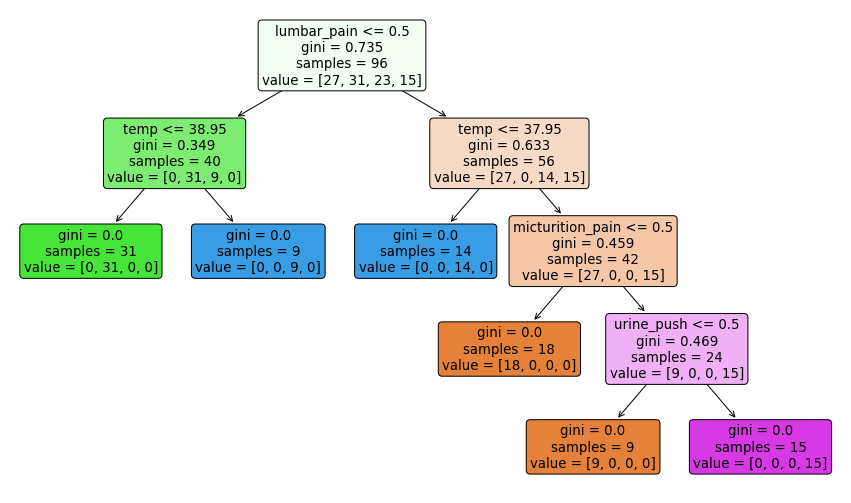

In [47]:
plt.subplots(figsize=(15, 9))
tree.plot_tree(classifier.classifier, filled=True, rounded=True, feature_names=features)
print("Decision Tree - using label power set")
plt.show()

## Another option - Building decision classifier without label powerset

In [48]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
pr_y=dt.predict(x_test)
dt_mse_test = mean_squared_error(y_test, pr_y)
print("Test mse:", dt_mse_test)

Test mse: 0.0


Decision Tree - without label powerset


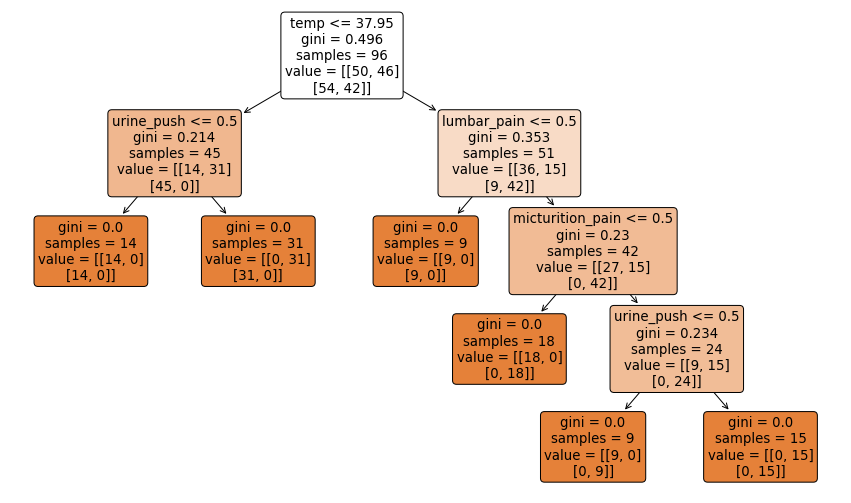

In [49]:
plt.subplots(figsize=(15, 9))
tree.plot_tree(dt,filled=True, rounded=True, feature_names=features,)
print("Decision Tree - without label powerset")
plt.show()

### Tree to pseudo - decision classifier with label powerset

In [50]:
tree_to_pseudo(classifier.classifier, features)

 if ( lumbar_pain <= 0.5 ) {
   if ( temp <= 38.95000076293945 ) {
     return [[ 0. 31.  0.  0.]]
   } else {
     return [[0. 0. 9. 0.]]
   }
 } else {
   if ( temp <= 37.95000076293945 ) {
     return [[ 0.  0. 14.  0.]]
   } else {
     if ( micturition_pain <= 0.5 ) {
       return [[18.  0.  0.  0.]]
     } else {
       if ( urine_push <= 0.5 ) {
         return [[9. 0. 0. 0.]]
       } else {
         return [[ 0.  0.  0. 15.]]
       }
     }
   }
 }


### Tree to code - decision classifier with label powerset

In [51]:
tree_to_code(classifier.classifier, features)

def tree(temp, nausea_occurence, lumbar_pain, urine_push, micturition_pain, urethra_burn):
  if lumbar_pain <= 0.5:
    if temp <= 38.95000076293945:
      return [[ 0. 31.  0.  0.]]
    else:  # if temp > 38.95000076293945
      return [[0. 0. 9. 0.]]
  else:  # if lumbar_pain > 0.5
    if temp <= 37.95000076293945:
      return [[ 0.  0. 14.  0.]]
    else:  # if temp > 37.95000076293945
      if micturition_pain <= 0.5:
        return [[18.  0.  0.  0.]]
      else:  # if micturition_pain > 0.5
        if urine_push <= 0.5:
          return [[9. 0. 0. 0.]]
        else:  # if urine_push > 0.5
          return [[ 0.  0.  0. 15.]]


### Tree to pseudo - decision classifier without label powerset

In [52]:
tree_to_pseudo(dt, features)

 if ( temp <= 37.95000076293945 ) {
   if ( urine_push <= 0.5 ) {
     return [[14.  0.]
 [14.  0.]]
   } else {
     return [[ 0. 31.]
 [31.  0.]]
   }
 } else {
   if ( lumbar_pain <= 0.5 ) {
     return [[9. 0.]
 [9. 0.]]
   } else {
     if ( micturition_pain <= 0.5 ) {
       return [[18.  0.]
 [ 0. 18.]]
     } else {
       if ( urine_push <= 0.5 ) {
         return [[9. 0.]
 [0. 9.]]
       } else {
         return [[ 0. 15.]
 [ 0. 15.]]
       }
     }
   }
 }


### Tree to code - decision classifier without label powerset

In [53]:
tree_to_code(dt, features)

def tree(temp, nausea_occurence, lumbar_pain, urine_push, micturition_pain, urethra_burn):
  if temp <= 37.95000076293945:
    if urine_push <= 0.5:
      return [[14.  0.]
 [14.  0.]]
    else:  # if urine_push > 0.5
      return [[ 0. 31.]
 [31.  0.]]
  else:  # if temp > 37.95000076293945
    if lumbar_pain <= 0.5:
      return [[9. 0.]
 [9. 0.]]
    else:  # if lumbar_pain > 0.5
      if micturition_pain <= 0.5:
        return [[18.  0.]
 [ 0. 18.]]
      else:  # if micturition_pain > 0.5
        if urine_push <= 0.5:
          return [[9. 0.]
 [0. 9.]]
        else:  # if urine_push > 0.5
          return [[ 0. 15.]
 [ 0. 15.]]


## Finding minimal decision tree

In [54]:
path = classifier.classifier.cost_complexity_pruning_path(x_train, y_train)
alphas=path['ccp_alphas']
print("Alpha Values :",alphas)

all_MSE=[]

for alpha in alphas:
    decision_tree = DecisionTreeClassifier(ccp_alpha=alpha)
    kf = KFold(n_splits=10)
    MSE=[]
    for train_index,val_index in kf.split(x_train):
        x_train_dt, val_x_dt = x_train.iloc[train_index.tolist(),:], x_train.iloc[val_index.tolist(),:]
        y_train_dt, val_y_dt = np.array(y_train)[train_index.tolist()], np.array(y_train)[val_index.tolist()]
        d_tree = DecisionTreeClassifier(ccp_alpha=alpha,random_state=0)
        d_tree.fit(x_train_dt,y_train_dt)
        pred_val_y=d_tree.predict(val_x_dt)
        mse = mean_squared_error(val_y_dt, pred_val_y)
        MSE.append(mse)
        
    all_MSE.append(np.mean(MSE))


min_mse_index=np.argmin(all_MSE)
best_alpha=alphas[min_mse_index]

print("Best Alpha is:", best_alpha)
result=pd.DataFrame({ 'Alphas': alphas, 
    'MSE': all_MSE})
        
result

Alpha Values : [0.         0.05022321 0.08705357 0.10046296 0.20769676]
Best Alpha is: 0.0


,Alphas,MSE
0,0.000000,0.010000
1,0.050223,0.081111
2,0.087054,0.146667
3,0.100463,0.176667
4,0.207697,0.366111


## Testing using Decision tree with  best alpha value

In [55]:
best_tree = DecisionTreeClassifier(ccp_alpha=best_alpha,random_state=0)
best_tree.fit(x_train,y_train)
pred_y=best_tree.predict(x_test)
mse_test = mean_squared_error(y_test, pred_y)
print("Test mse:", mse_test)

Test mse: 0.0


tree_to_pseudo(best_tree, features)

In [56]:
tree_to_code(best_tree, features);

def tree(temp, nausea_occurence, lumbar_pain, urine_push, micturition_pain, urethra_burn):
  if temp <= 37.95000076293945:
    if urine_push <= 0.5:
      return [[14.  0.]
 [14.  0.]]
    else:  # if urine_push > 0.5
      return [[ 0. 31.]
 [31.  0.]]
  else:  # if temp > 37.95000076293945
    if lumbar_pain <= 0.5:
      return [[9. 0.]
 [9. 0.]]
    else:  # if lumbar_pain > 0.5
      if micturition_pain <= 0.5:
        return [[18.  0.]
 [ 0. 18.]]
      else:  # if micturition_pain > 0.5
        if urine_push <= 0.5:
          return [[9. 0.]
 [0. 9.]]
        else:  # if urine_push > 0.5
          return [[ 0. 15.]
 [ 0. 15.]]


Minimal Decision Tree with best alpha 


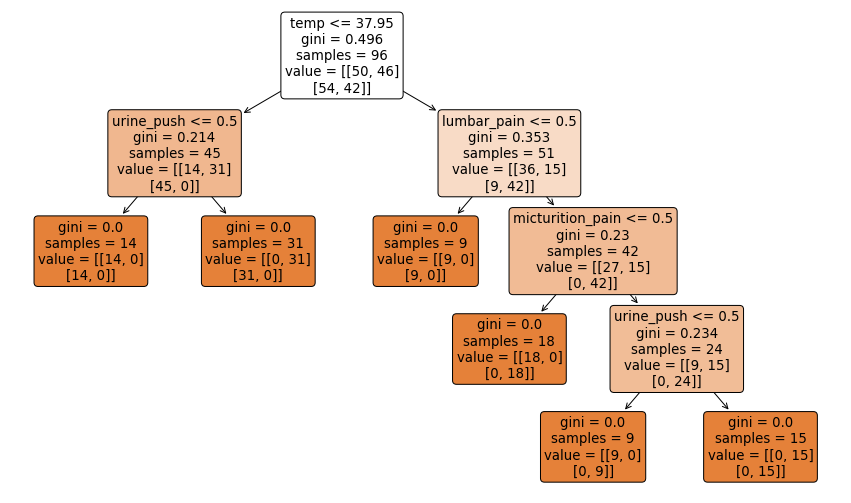

In [57]:
plt.subplots(figsize=(15, 9))
print("Minimal Decision Tree with best alpha ")
tree.plot_tree(best_tree, filled=True, rounded=True, feature_names=features)
plt.show()